<a href="https://colab.research.google.com/github/iizmyy/Analisis-dan-Visualisasi-Data/blob/main/Latihan_Modul_5_Bahasa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [132]:
# Membaca data
alamat <- 'https://raw.githubusercontent.com/iizmyy/Analisis-dan-Visualisasi-Data/main/dataset/komentarHotel.txt'
review <- readLines(alamat)
review

[1] "pelayanan ramah dan hangat, sayang ac sempat mati selama 2 jam, tapi syukurlah ac bisa diperbaiki, overall oke lah"                            
[2] "viewnya bagus, cocok untuk melepas lelah, nunggu di FO agak lama, kamar bersih, ac agak bermasalah, ac kurang dingin, mohon maintenance dong.."
[3] "breakfast enak, anak-anak suka, pelayanan ramah, tempat bermain bagus"

In [7]:
install.packages("quanteda")
library(quanteda)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [31]:
# Import stopword bahasa indonesia
stopwordsid <- readLines('https://raw.githubusercontent.com/iizmyy/bilp/master/stoplist.txt')

In [131]:
# Install library Stemming bahasa indonesia

#install.packages("devtools")
#library(devtools)
#install_github("nurandi/katadasaR")
#library(katadasaR)
katadasaR("makanan")

[1] "makan"

In [128]:
# Normalisasi Teks
# Tokenisasi
review.token <- tokens(review)
#review.token
# Merubah ke huruf kecil
review.hkecil <- tokens_tolower(review.token)

# Symbol Removal
review.nosimbol <- tokens(review.hkecil, remove_numbers = TRUE, remove_symbols = TRUE, remove_punct = TRUE)

# Hilangkan stopwords
review.stopwords <- tokens_remove(review.nosimbol, stopwordsid)

# Stemming
stemming <- function(x){
  paste(lapply(x, katadasaR), collapse = " ")
}
review.stemming <- tokenize_fasterword(lapply(review.stopwords, stemming))
review.stemming.token <- tokens(review.stemming)

# Konversi teks menjadi angka
hasildfm <- dfm(review.stemming.token, verbose = TRUE)
topfeatures(hasildfm, 20)

#head(dfm_sort(hasildfm, decreasing = TRUE, margin = "both"), n=10, nf=10)

Creating a dfm from a tokens input...

 ...lowercasing

 ...found 3 documents, 29 features

 ...complete, elapsed time: 0.025 seconds.

Finished constructing a 3 x 29 sparse dfm.



ac    ayan   ramah   bagus  hangat  sayang    mati     jam  syukur    baik 
      4       2       2       2       1       1       1       1       1       1 
overall     oke viewnya   cocok   lepas   lelah  nunggu      fo   kamar  bersih 
      1       1       1       1       1       1       1       1       1       1

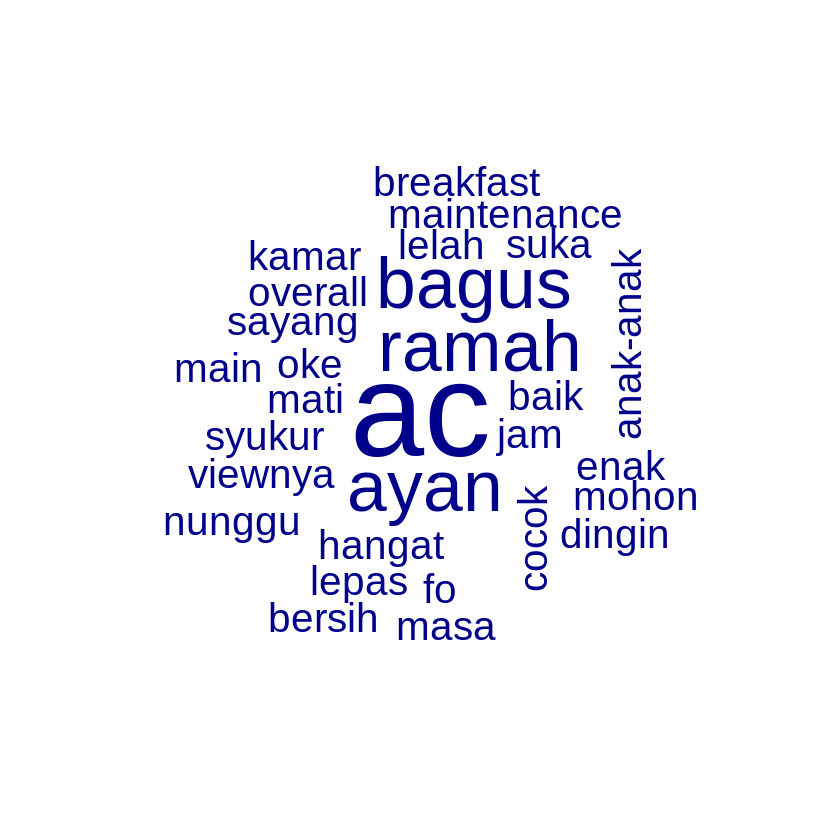

In [126]:
# Install textplots
#install.packages("quanteda.textplots")
#library(quanteda.textplots)
textplot_wordcloud(hasildfm, min_count = 1, max_size = 7)